## Load Packages 

In [133]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Reading the data

In [134]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [135]:
train.shape, test.shape

((8523, 12), (5681, 11))

Copy train and test data so original data isnt lost after changes are made

In [136]:
train_copy = train.copy()
test_copy = test.copy()

## Feature of Datasets 

In [137]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

Merge the two datasets into one

In [138]:
train['Source'] = 'Train'
test['Source'] = 'Test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)

In [139]:
train.shape, test.shape, data.shape

((8523, 13), (5681, 13), (14204, 13))

## Exploratory Data Analysis

In [140]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

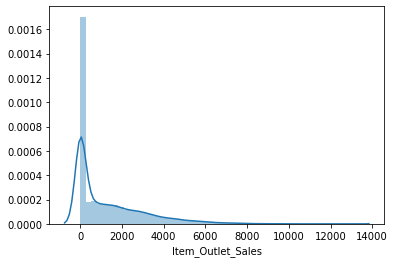

In [141]:
sns.distplot(data['Item_Outlet_Sales'])

The distribution is not normal, is skewed to the left and shows peakedness.

### Extracting Categorical and Numerical Features

In [142]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,Train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,Train


In [143]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [144]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

### Univariate EDA
#### Target Variable 

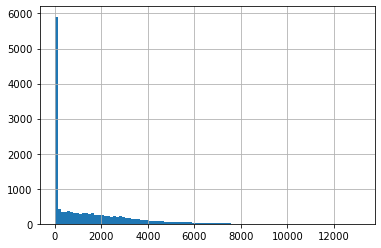

In [145]:
data['Item_Outlet_Sales'].hist(bins=100);

The data is skewed to the left and would have to undergo transformation to treat its skewness.

#### Independent Variables (Numerical)

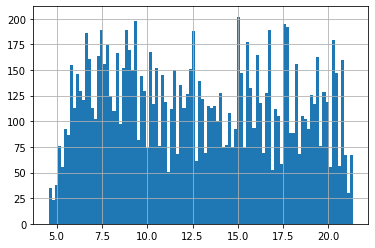

In [146]:
data['Item_Weight'].hist(bins=100)

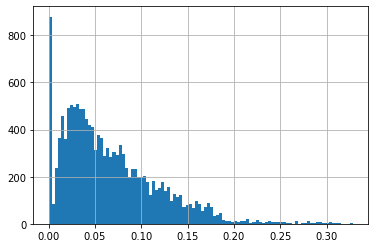

In [147]:
data['Item_Visibility'].hist(bins=100)

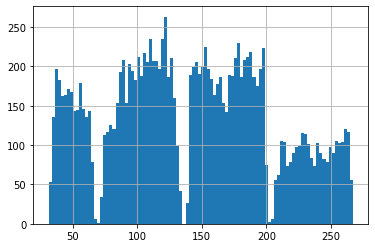

In [148]:
data['Item_MRP'].hist(bins=100)

##### Observations:
- There is no obvious distribution pattern in 'Item_Weight'
- Item_Visibility is skewed and will have to undergo transformation to treat this
- There are 4 different distributions for 'Item_MRP'. This is an interesting insight and should be investigated later. 

#### Independent Variables (Categorical)

In [149]:
def count(data, col):
    plot = sns.countplot(col, data=data)
    return plot;

In [150]:
def hcount(data, col):
    plot = sns.countplot(y=col, data=data)
    return plot;

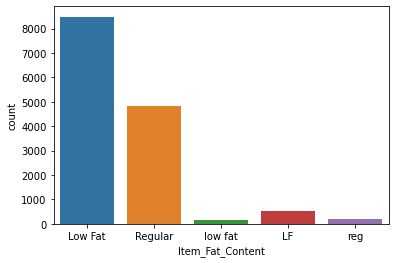

In [151]:
count(data=data, col='Item_Fat_Content')

Low Fat, low fat, and LF all belong to the same category as well as Regular and reg. These columns will be merged into one for more accurate results and the function will be called again

In [152]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

In [153]:
data['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

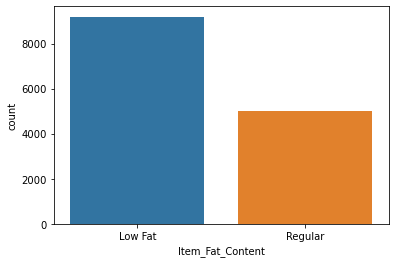

In [154]:
count(data=data, col='Item_Fat_Content')

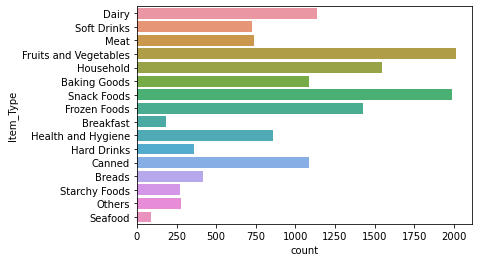

In [155]:
hcount(data=data, col='Item_Type')

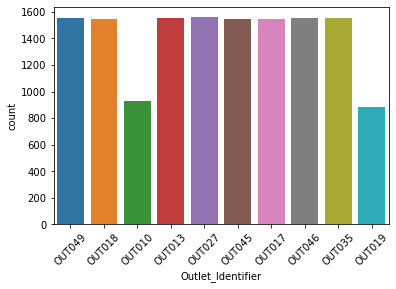

In [156]:
plt.xticks(rotation = 45)
count(data=data, col='Outlet_Identifier')

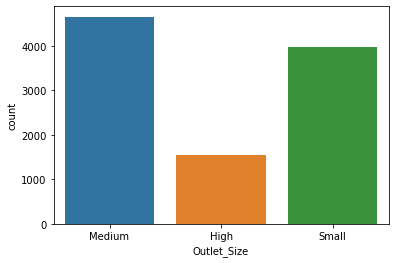

In [157]:
count(data=data, col='Outlet_Size')

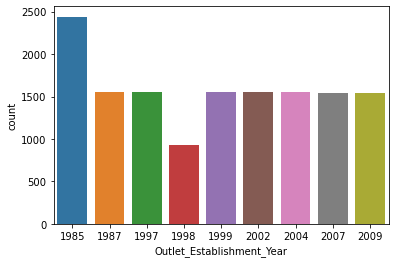

In [158]:
count(data=data, col='Outlet_Establishment_Year')

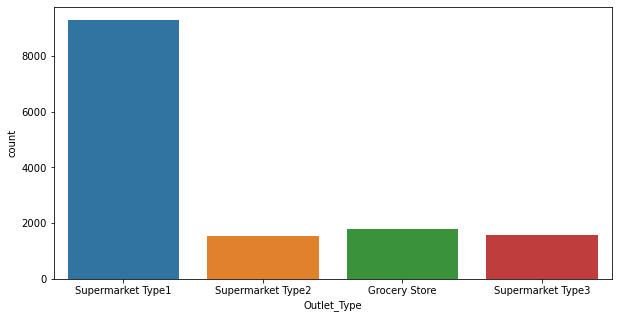

In [159]:
plt.figure(figsize=(10,5))
count(data=data, col='Outlet_Type')

##### Observations:
- Low Fat Content sells the most accross all Outlets
- Fruits and Vegetables and Snack Foods are the most bought items accross all Outlets
- Supermarket Type 1 is the most popular outlet type
- Lesser number of observations for outlets established 1988 with outlets established 1985 having the most observations.

### Bivariate EDA 

#### Target Variable vs Independent Numerical Variable

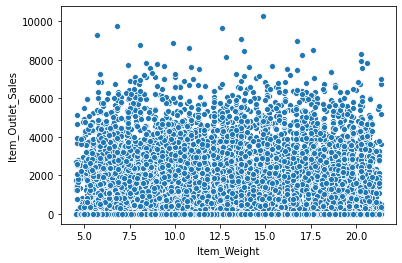

In [160]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=data)

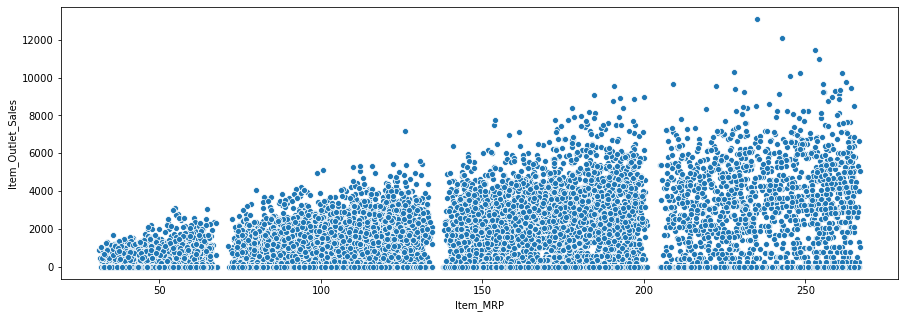

In [161]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)

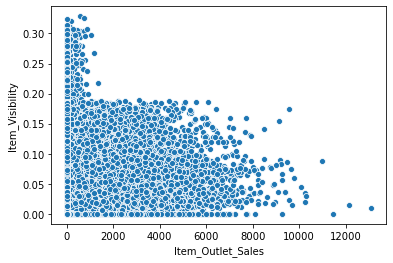

In [162]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = data)

##### Observations:
- Item Outlet Sales is well spread across Item Weight with no obvious pattern.
- In figure 3, there are points that sugessts Item Visibilty to be 0 which can't be possible. This will be dealt with in later stages
- In figure 2, we can see 4 different segments of prices in Item MRP vs Item Outlet Sales. This will also be noted. 

#### Target Variable vs Independent Categorical Variables

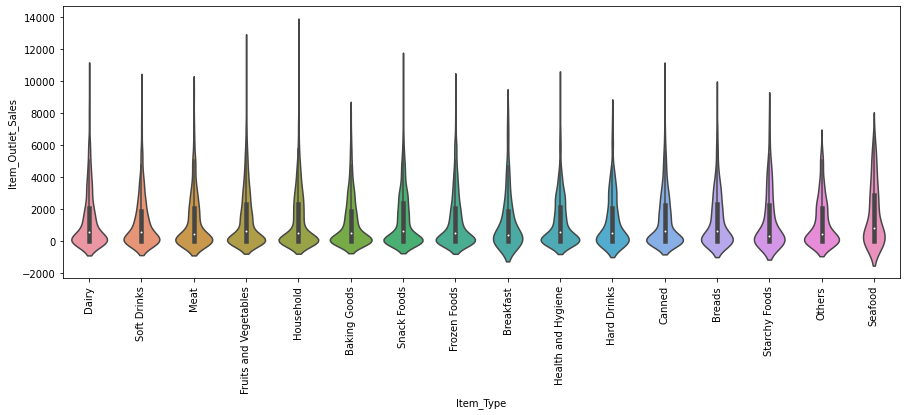

In [163]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=data)

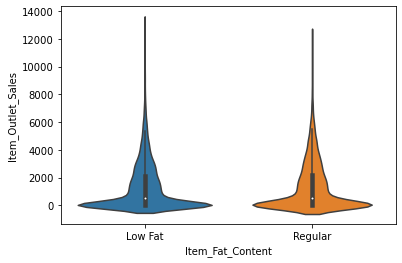

In [164]:
sns.violinplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)

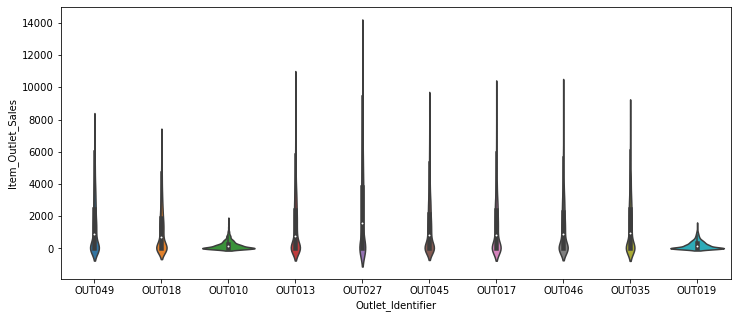

In [165]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data)

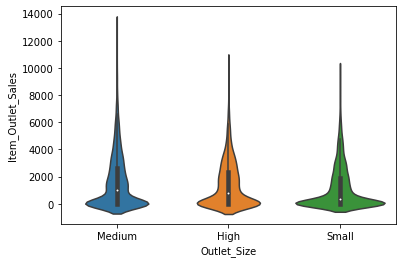

In [166]:
sns.violinplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data)

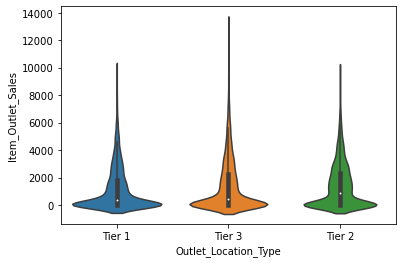

In [167]:
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)

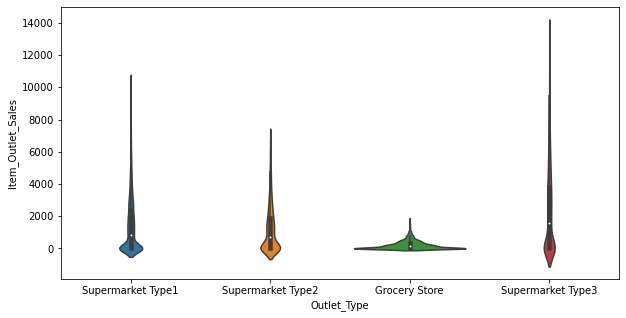

In [168]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)

##### Observations:
- Distribution of Item Outlet Sales vs Item Fat content and Item Type aren't very distinct.
- In the Outlet Identifier category, distribution of Outlet Types OUT010 ad OUT019 are very dissimilar to the rest of the categories in the distribution. 
- In Outlet Type, Grocery Store has most of its observations around the lower sales values as compared to the other categories.

### Multivariate EDA

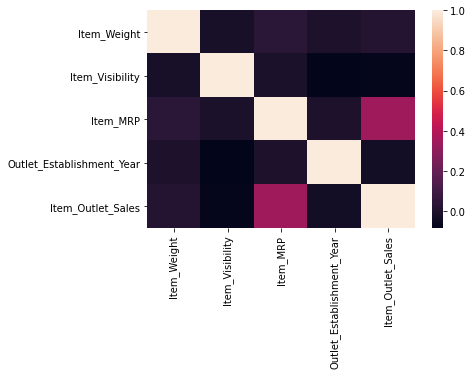

In [169]:
correlation = data.corr()
sns.heatmap(correlation)

## Data PreProcessing

### Imputing Missing Values

In [170]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

In [171]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
a = encoder.fit_transform(data['Item_Identifier'])
a

array([ 156,    8,  662, ..., 1426,  521,  997])

In [172]:
data['Item_Weight'].fillna(a.mean(), inplace=True)

In [173]:
data['Item_Weight'].isna().sum()

0

In [174]:
data['Outlet_Size'].fillna('Small', inplace=True)

In [175]:
data['Outlet_Size'].isna().sum()

0

Now to address the zero Visibility in Item Visibility plot. we will replace them with the mean of all Item_Visbility values

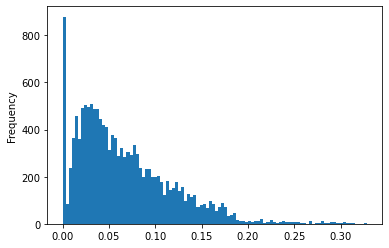

In [176]:
data['Item_Visibility'].plot(kind='hist', bins=100)

In [177]:
data.shape

(14204, 13)

In [178]:
s = data[data['Item_Visibility'] != 0]['Item_Visibility'].mean()

In [179]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0.00,s)

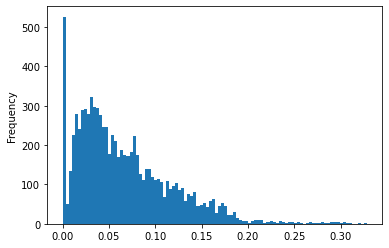

In [180]:
train['Item_Visibility'].plot(kind='hist', bins=100)

### Feature Engineering

New features will be created from the existing ones in hopes of improving the model's performance

It is possible to create a new feature from the Item Identifier column. 

In [181]:
data['Item_Identifier'].head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

If my understanding is correct then the first two letters of the values stand for Food, Drink and Non-Consumable. A new feature will be created bearing these three values.

In [182]:
#select the first two characters
data['Item_Class'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Class'] = data['Item_Class'].map({'FD':'Food',
                                                     'NC':'Non-Consumable',
                                                     'DR':'Drinks'})
data['Item_Class'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Class, dtype: int64

We can also create a new column showing how many years a particular Outlet has been in operation

In [183]:
data['Outlet_Age'] = 2020 - data['Outlet_Establishment_Year']
data['Outlet_Age'].describe()

count    14204.000000
mean        22.169319
std          8.371664
min         11.000000
25%         16.000000
50%         21.000000
75%         33.000000
max         35.000000
Name: Outlet_Age, dtype: float64

In the Item_MRP vs Item_Outlet_Sales plot it was observed that Item_MRP was spread across in 4 segments. we shall assign a label to each of these segments and use this label to create a new variable

In [184]:
def segments(x):
    if x<69:
        return 'Segment A'
    elif x in range(69,136):
        return 'Segment B'
    elif x in range(137, 203):
        return 'Segment C'
    else:
        return 'Segment D'
    
data['MRP_Segments'] = data['Item_MRP'].astype('int').apply(segments)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Item_Class,Outlet_Age,MRP_Segments
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,Food,21,Segment D
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train,Drinks,11,Segment A
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train,Food,21,Segment C
3,FDX07,19.20,Regular,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Train,Food,22,Segment C
4,NCD19,8.93,Low Fat,0.070303,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train,Non-Consumable,33,Segment A


In [185]:
data['MRP_Segments'].value_counts()

Segment C    4935
Segment B    4661
Segment D    2400
Segment A    2208
Name: MRP_Segments, dtype: int64

### Encoding Categorical Variables

In [186]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Outlet_Size']= le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['MRP_Segments'] = le.fit_transform(data['MRP_Segments'])

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int32  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int32  
 9   Outlet_Location_Type       14204 non-null  int32  
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  Source                     14204 non-null  object 
 13  Item_Class                 14204 non-null  obje

In [188]:
dummies = pd.get_dummies(data[['Item_Identifier','Outlet_Identifier','Outlet_Type','Item_Class']])

In [189]:
data = data.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Class'],axis=1)
data = pd.concat([data,dummies],axis=1)

### Eliminating Skewness

In [190]:
data['Item_Visibility'] = np.log(data['Item_Visibility'])

#### Preparing the Data for Model

In [191]:
data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [204]:
train = data.loc[data['Source']=='Train']
test = data.loc[data['Source']=='Test']

In [205]:
test.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)
train.drop(['Source'],axis=1,inplace=True)

In [206]:
train.to_csv('new_train.csv',index=False)
test.to_csv('new_test.csv',index=False)

## Building the Model

In [207]:
from sklearn.linear_model import LinearRegression
X_train = train.drop(['Item_Outlet_Sales'],axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test

In [208]:
regressor = LinearRegression(normalize=True, fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression(normalize=True)

In [209]:
y_pred = regressor.predict(X_test)